# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
#data['income_type'].unique()
data[data['total_income'].isna()]

#data[data['total_income'].isna()]['income_type'].value_counts() 



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [43]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

In [44]:
data.loc[82]

children                          2
days_employed                   NaN
dob_years                        50
education                    высшее
education_id                      0
family_status       женат / замужем
family_status_id                  0
gender                            F
income_type               сотрудник
debt                              0
total_income          142594.396847
purpose                       жилье
Name: 82, dtype: object

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [45]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [46]:
data = data[(data['children'] != -1) & (data['children'] != 2)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [47]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [48]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [49]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [50]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [51]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [52]:
data.duplicated().sum()

71

In [53]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [54]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [55]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [56]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [57]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [58]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [59]:
#создаем пустой датафрейм
children_debt = pd.DataFrame()
#создаем столбец, показывающий количество заемщиков по количеству детей
children_debt['children_count'] = data.groupby('children')['debt'].count() 
#создаем столбец, показывающий количество просрочек оплаты по кредиту по количеству детей
children_debt['children_sum'] = data.groupby('children')['debt'].sum()
#создаем столбец, показывающий долю людей, которые просрочили оплату, по количеству детей
children_debt['children_final'] = children_debt['children_sum'] / children_debt['children_count'] 
#сортируем по количеству детей, по возрастанию
children_debt = children_debt.sort_values('children', ascending = True)
children_debt

,children_count,children_sum,children_final
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


<AxesSubplot:xlabel='children', ylabel='children_final'>

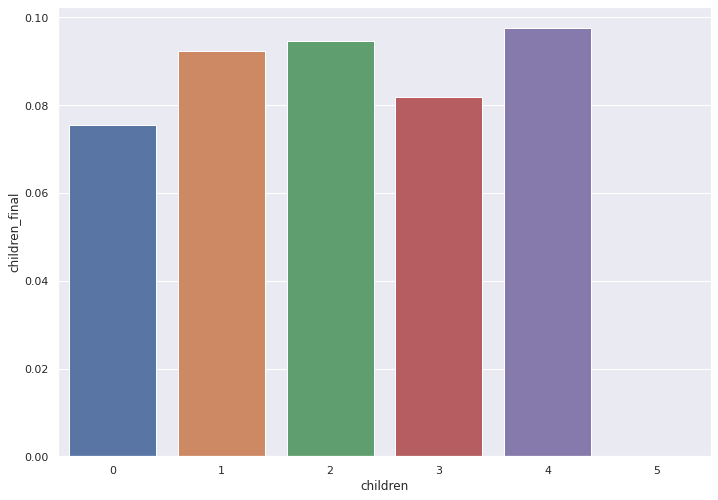

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

children_debt = data.groupby('children', as_index=False).agg(
    debt_count = ('debt', 'count'), debt_sum = ('debt', 'sum')
)
children_debt['children_final'] = children_debt['debt_sum'] \
/ children_debt['debt_count'] 
sns.barplot(data=children_debt, x='children', y='children_final')


**Вывод:** #согласно полученным значениям: 
Заемщики без детей чаще оплачивают кредит в срок.
Заемщики имеющие 1-2 ребенка оплачивают кредит в срок реже, чем заемщики без детей, возможно из-за повышения расходов на содержание детей.
Заемщики имеющие 3 детей так же оплачивают кредит в срок реже, чем заемщики без детей, но чаще чем заемщики имеющие 1-2 ребенка, возможно, так как большое количество детей имеют более обеспеченные заемщики.
Количество заемщиков с 4 и 5 детьми мало, сравнивать эти показатели может быть нецелесообразно.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [61]:
# решение аналогичено предудущей задаче
family_status_debt = pd.DataFrame()
family_status_debt['family_status_sum'] = data.groupby('family_status')['debt'].sum()
family_status_debt['family_status_count'] = data.groupby('family_status')['debt'].count()
family_status_debt['family_status_final'] = family_status_debt['family_status_sum'] / family_status_debt['family_status_count'] 
family_status_debt.sort_values('family_status_final', ascending = True)

,family_status_sum,family_status_count,family_status_final
family_status,,,
вдовец / вдова,63,951,0.066246
в разводе,84,1189,0.070648
женат / замужем,927,12261,0.075606
гражданский брак,385,4134,0.093130
Не женат / не замужем,273,2796,0.097639


<AxesSubplot:xlabel='family_status', ylabel='family_status_final'>

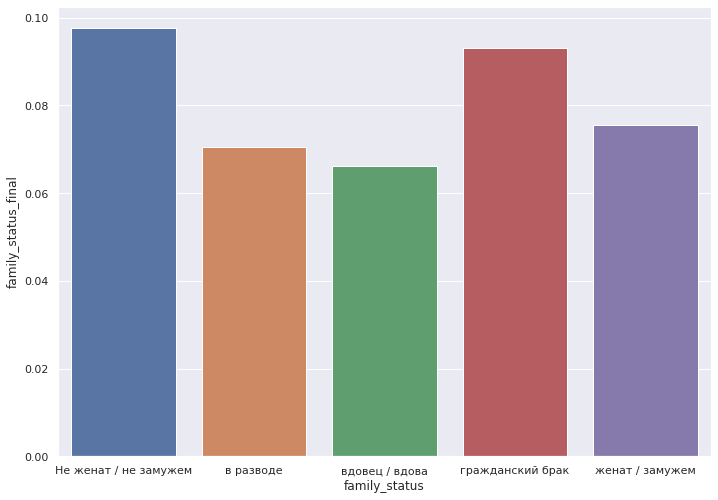

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

family_status_debt = data.groupby('family_status', as_index=False).agg(
    debt_count = ('debt', 'count'), debt_sum = ('debt', 'sum')
)
family_status_debt['family_status_final'] = family_status_debt['debt_sum'] \
/ family_status_debt['debt_count'] 
sns.barplot(data=family_status_debt, x='family_status', y='family_status_final')



**Вывод:** Зависимоть между семейным положением и возвратом кредита в срок есть:
Заемщики-вдовцы и заемщики в разводе чаще платят в срок, чем люди в браке.
Не женатые и не замужные не платят в срок чаще всех.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [63]:
# решение анолагично предыдущей задаче
# А-заемщики с наибольшими зарплатами, ..., E - заемщики с наименьшими зарплатами
income_debt = pd.DataFrame()
income_debt['income_debt_sum'] = data.groupby('total_income_category')['debt'].sum()
income_debt['income_debt_count'] = data.groupby('total_income_category')['debt'].count()
income_debt['income_debt_final'] = income_debt['income_debt_sum'] / income_debt['income_debt_count'] 
income_debt.sort_values('total_income_category', ascending = True)

,income_debt_sum,income_debt_count,income_debt_final
total_income_category,,,
A,2,25,0.080000
B,354,5014,0.070602
C,1353,15921,0.084982
D,21,349,0.060172
E,2,22,0.090909


**Вывод:** выплата кредита в срок не зависит от уровня дохода заемщика

In [64]:
def categorize_income(income):
    try:
        if 0 <= income <= 50000:
            return 'низкий доход'
        elif 50001 <= income <= 200000:
            return 'средний доход'
        elif income >= 200000:
            return 'высокий доход'
    except:
        pass

data['total_income_category'] = data['total_income'].apply(categorize_income)

income_debt = pd.DataFrame()
income_debt['income_debt_sum'] = data.groupby('total_income_category')['debt'].sum()
income_debt['income_debt_count'] = data.groupby('total_income_category')['debt'].count()
income_debt['income_debt_final'] = income_debt['income_debt_sum'] / income_debt['income_debt_count'] 
#расположим по возрастанию строки таблицы по доле заемщиков просрочивших оплату 
income_debt.sort_values('income_debt_final', ascending = True)



,income_debt_sum,income_debt_count,income_debt_final
total_income_category,,,
низкий доход,23,371,0.061995
высокий доход,356,5039,0.070649
средний доход,1353,15921,0.084982


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [65]:
# решение аналогично предыдущей задаче
debt_from_purpose_category = pd.DataFrame()
debt_from_purpose_category['sum_purpose_category'] = data.groupby('purpose_category')['debt'].sum()
debt_from_purpose_category['count_purpose_category'] = data.groupby('purpose_category')['debt'].count()
debt_from_purpose_category['result_purpose_category'] = debt_from_purpose_category['sum_purpose_category'] / debt_from_purpose_category['count_purpose_category'] 
debt_from_purpose_category.sort_values('result_purpose_category', ascending = True)# Ваш код будет здесь. Вы можете создавать новые ячейки.

,sum_purpose_category,count_purpose_category,result_purpose_category
purpose_category,,,
операции с недвижимостью,780,10751,0.072551
проведение свадьбы,183,2313,0.079118
получение образования,369,3988,0.092528
операции с автомобилем,400,4279,0.093480


**Вывод:** анализируя данные из таблицы, мы видим, что заемщики берущие кредит на недвижимость и на проведение свадьбы, чаще платят в срок, чем заемщики берущие кредит на автомобили и образование

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Причинами появления пропусков могут быть: 
Технологические ошибки - возникают при копировании, считывании, смене формата. Сбой может произойти даже во время записи данных. 
Человеческий фактор - ошибки человека или сокрытие информации.
Такой информации нет.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* когда мы заполняем пропуска медианными значениями, мы меньше искажаем результат при анализе, чем если бы заполняли нулям.

In [66]:
old_staff = pd.Series([100, 100, 100, 100, 100])
new_director = pd.Series([100, 100, 100, 100, 100, 300]) 
old_staff_mean = old_staff.mean()
new_director_mean = new_director.mean()
new_director_mean / old_staff_mean - 1  
print(f'Зарплата выросла на {new_director_mean / old_staff_mean - 1:.0%}') 

Зарплата выросла на 33%


In [67]:
new_director_median = new_director.median()
print(new_director_median) 

100.0


### Шаг 4: общий вывод.

На основании анализа данных, мы приходим к выводу, что банкам выгоднее давать кредиты людям без детей, вдовцам, разведенным, людям состоящим в браке, чем не состоящим в браке, берущих кредит на операции с недвижимостью. Уровень дохода не влияет на своевременность оплаты кредита. 

   Кредитным отделом банка была поставлена задачи:
   1. Определить влияет ли семейное положение на факт погашения кредита в срок;
   2. Определить влияет ли количество детей клиента на факт погашения кредита в срок.
   
Проведен анализ данных из статистики платежеспособности клиентов, полученного от кредитного отдела банка.
Сделаны следующие выводы:

1. **Семейное положение влияет** на факт погашения кредита в срок соедующим образом:

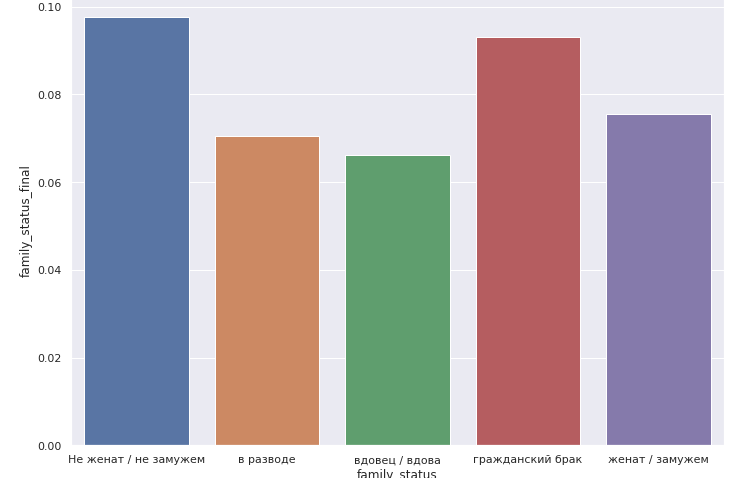

На столбчатой диаграме:
По вертикальной оси расположено значение доли заемщиков которые просрочили оплату,
по горизонтальной оси расположены виды семейного положения заемщиков.

* Доля заемщиков-вдовцов просрочивших оплату - 6,6 %
* Доля заемщиков в разводе просрочивших оплату - 7 %
* Доля заемщиков в официальном браке просрочивших оплату - 7,5 %
* Доля заемщиков в гражданском браке просрочивших оплату - 9,3 %
* Доля заемщиков не состоящих в браке просрочивших оплату - 9,7 %

**Вывод:** Заемщики-вдовцы и заемщики в разводе чаще платят в срок, чем люди в браке.
Не женатые и не замужные не платят в срок чаще всех.

2. **Количество детей влияет** на факт погашения кредита в срок следующим образом:

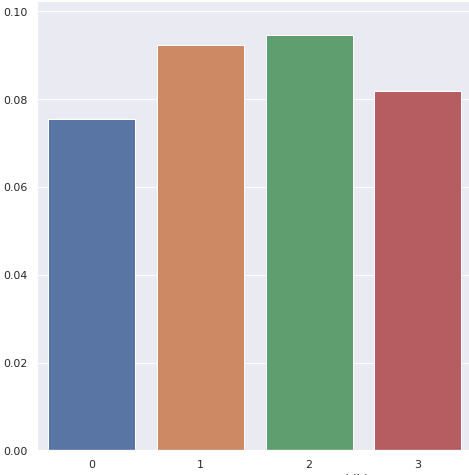

На столбчатой диаграме:
По вертикальной оси расположено значение доли заемщиков которые просрочили оплату,
по горизонтальной оси расположено количество детей у заемщика.

* Доля заемщиков без детей просрочивших оплату - 7,5 %
* Доля заемщиков с 3 детьми просрочивших оплату - 8,1 %
* Доля заемщиков с 1 ребенком просрочивших оплату - 9,2 %
* Доля заемщиков с 2 детьми просрочивших оплату - 9,4 %


**Вывод:** согласно полученным значениям: 
Заемщики без детей чаще оплачивают кредит в срок.
Заемщики имеющие 1-2 ребенка оплачивают кредит в срок реже, чем заемщики без детей, возможно из-за повышения расходов на содержание детей.
Заемщики имеющие 3 детей так же оплачивают кредит в срок реже, чем заемщики без детей, но чаще чем заемщики имеющие 1-2 ребенка, возможно, так как большое количество детей имеют более обеспеченные заемщики.
Количество заемщиков с 4 и 5 детьми мало, сравнивать эти показатели может быть нецелесообразно.




Так же на основании данных сделаны **дополнительные выводы:**

Заемщики с доходом менее 50000 руб./мес., чаще платят за кредит в срок, чем заемщики получающие больше 50000 руб./мес.

Заемщики у которых целью кредита является пробретение недвижимости, чаще платят за кредит в срок, чем заемщики с целью проведения свадьбы, получения образования и приобретения автомомбиля.

